<a href="https://colab.research.google.com/github/princebansal2000/Geeksman-project-1/blob/master/Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading Dataset from kaggle and training it.

Upload kaggle.json file

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


Initializing environment variables so that kaggle api can work properly.

In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

Downloading dataset from kaggle.

In [3]:
!kaggle datasets download -d princebansal20/medical-equipment

 78% 9.00M/11.6M [00:00<00:00, 35.8MB/s]
100% 11.6M/11.6M [00:00<00:00, 38.6MB/s]


Unziping the downloading dataset

In [4]:
!unzip "*.zip"

Archive:  medical-equipment.zip
  inflating: my_data/Otoscope/00000000.jpg  
  inflating: my_data/Otoscope/00000001.jpg  
  inflating: my_data/Otoscope/00000002.jpg  
  inflating: my_data/Otoscope/00000003.jpg  
  inflating: my_data/Otoscope/00000004.jpg  
  inflating: my_data/Otoscope/00000005.jpg  
  inflating: my_data/Otoscope/00000006.jpg  
  inflating: my_data/Otoscope/00000007.jpg  
  inflating: my_data/Otoscope/00000008.jpg  
  inflating: my_data/Otoscope/00000009.jpg  
  inflating: my_data/Otoscope/00000010.jpg  
  inflating: my_data/Otoscope/00000011.jpg  
  inflating: my_data/Otoscope/00000012.jpg  
  inflating: my_data/Otoscope/00000013.jpg  
  inflating: my_data/Otoscope/00000014.jpg  
  inflating: my_data/Otoscope/00000015.jpg  
  inflating: my_data/Otoscope/00000016.jpg  
  inflating: my_data/Otoscope/00000017.jpg  
  inflating: my_data/Otoscope/00000018.jpg  
  inflating: my_data/Otoscope/00000019.jpg  
  inflating: my_data/Otoscope/00000020.jpg  
  inflating: my_data/Ot

checking how many directories are present in our dataset and printing it in form of list.

In [5]:
os.listdir("my_data")

['endoscope', 'dialyser', 'Thermometer', 'Stethoscope', 'enema', 'Otoscope']

Importing required libraries and ignoring warnings.

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

Initializing batch size.

In [7]:
bs=64

Creating databunch ,i.e, converting dataset into trainable form.

In [8]:
data = ImageDataBunch.from_folder( Path("my_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

printing some row of databunch

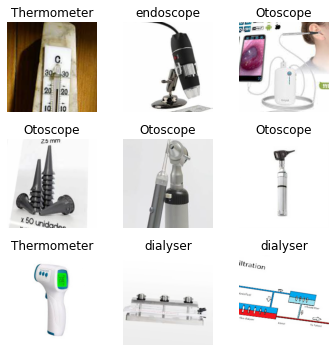

In [9]:
data.show_batch(rows=3, figsize=(5,5))

Printing the list of class names in databunch and it's length.

In [10]:
print(data.classes)
len(data.classes)

['Otoscope', 'Stethoscope', 'Thermometer', 'dialyser', 'endoscope', 'enema']


6

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.514799,0.943676,0.803618,14:10
1,1.079312,0.659051,0.816537,14:27
2,0.828415,0.548202,0.819121,14:19
3,0.632673,0.519590,0.821705,14:20


Mounting the drive.

In [13]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# os.makedirs("/content/drive/My Drive/medical_equipment",exist_ok=True)

Address of folder in drive to store files in it.

In [14]:
my_dir="/content/drive/My Drive/medical_equipment"

Saving the learn as stage1 file in drive .
stage1 means till now hoe much it has learn.
we can also say it like a checkpoint.

In [15]:
learn.save(my_dir+"/Stage-1")

Again loading the satge1 file.

In [16]:
learn.load("/content/drive/My Drive/medical_equipment/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (1550 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
endoscope,endoscope,endoscope,endoscope,endoscope
Path: my_data;

Valid: LabelList (387 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Otoscope,Otoscope,Thermometer,enema,enema
Path: my_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

Saving export.pkl file drive.

In [17]:
learn.export(my_dir+"/export.pkl")

In [18]:
learn.save(my_dir+"/Stage-1")